In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

## **Represent DataSet**

In [385]:
df=pd.read_csv("D:\\house-votes-84.csv")
df

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,REP,NaN,y,n,y,y,y,n,n,n,y,?,y,y,NaN,n,y
1,Republican,NaN,y,n,y,y,y,n,n,n,n,n,y,y,NaN,n,?
2,DEM,NaN,y,y,?,y,y,n,n,n,n,y,n,y,NaN,n,n
3,DEM,NaN,y,y,n,?,y,n,n,n,n,y,n,y,NaN,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Democrat,NaN,n,y,n,y,y,n,n,n,n,n,n,n,NaN,n,y
453,Republican,-999.0,n,y,y,y,n,y,n,y,y,n,n,y,NaN,n,y
454,DEM,-999.0,y,y,n,n,n,y,y,y,y,y,n,y,NaN,n,y
455,Democrat,NaN,y,y,n,n,n,y,y,y,n,n,n,n,NaN,?,?


## **EDA**

In [386]:
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,REP,NaN,y,n,y,y,y,n,n,n,y,?,y,y,NaN,n,y
1,Republican,NaN,y,n,y,y,y,n,n,n,n,n,y,y,NaN,n,?
2,DEM,NaN,y,y,?,y,y,n,n,n,n,y,n,y,NaN,n,n
3,DEM,NaN,y,y,n,?,y,n,n,n,n,y,n,y,NaN,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Party                                   414 non-null    object 
 1   Handicapped-infants                     25 non-null     float64
 2   Water-project-cost-sharing              414 non-null    object 
 3   Adoption-of-the-budget-resolution       414 non-null    object 
 4   Physician-fee-freeze                    414 non-null    object 
 5   El-salvador-aid                         414 non-null    object 
 6   Religious-groups-in-schools             414 non-null    object 
 7   Anti-satellite-test-ban                 414 non-null    object 
 8   Aid-to-nicaraguan-contras               414 non-null    object 
 9   MX-missile                              414 non-null    object 
 10  Immigration                             414 non-null    object

In [388]:
df.describe(include="all")

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
count,414,25.000000,414,414,414,414,414,414,414,414,414,414,414,414,0.0,414,414
unique,6,NaN,3,3,3,3,3,3,3,3,3,3,3,3,NaN,3,3
top,DEM,NaN,y,y,n,y,y,y,y,n,y,n,n,y,NaN,n,y
freq,92,NaN,189,239,229,211,268,218,222,200,206,254,216,210,NaN,231,252
mean,NaN,-998.950648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.175010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Cleaning**

In [389]:
df.duplicated().sum()

110

In [390]:
df=df.drop_duplicates()

In [391]:
df.isna().sum()

Party                                       2
Handicapped-infants                       325
Water-project-cost-sharing                  2
Adoption-of-the-budget-resolution           2
Physician-fee-freeze                        2
El-salvador-aid                             2
Religious-groups-in-schools                 2
Anti-satellite-test-ban                     2
Aid-to-nicaraguan-contras                   2
MX-missile                                  2
Immigration                                 2
Synfuels-corporation-cutback                2
Education-spending                          2
Superfund-right-to-sue                      2
Crime                                     347
Duty-free-exports                           2
Export-administration-act-south-africa      2
dtype: int64

In [392]:
df=df.drop(["Handicapped-infants","Crime"],axis=1)

In [393]:
df.columns=df.columns.str.strip()

In [394]:
df["Party"].unique()

array(['REP', 'Republican', 'DEM', nan, 'demo', 'repub', 'Democrat'],
      dtype=object)

In [395]:
df["Party"]=df["Party"].replace(["REP","repub"],"Republican")

In [396]:
df["Party"]=df["Party"].replace(["DEM","demo"],"Democrat")

In [397]:
df["Party"].unique()

array(['Republican', 'Democrat', nan], dtype=object)

## **Impute missing values**

In [398]:
imputer=SimpleImputer(strategy="most_frequent")

In [399]:
df=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## **Encoding data**

In [400]:
le=LabelEncoder()

In [401]:
dff=df.copy()


In [402]:
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

## **Define Features (X) & Target (y)**

In [403]:
x = df.drop("Party", axis=1)
y = df["Party"]

## **Data Visualization**

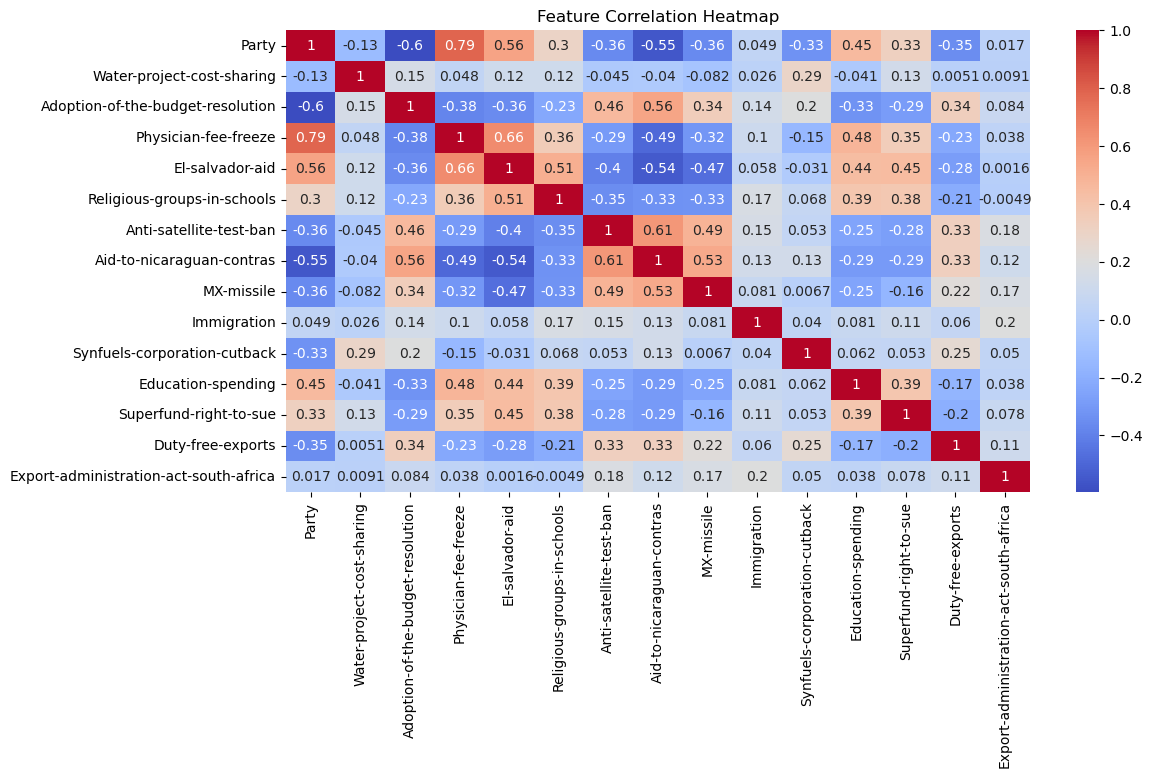

In [404]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

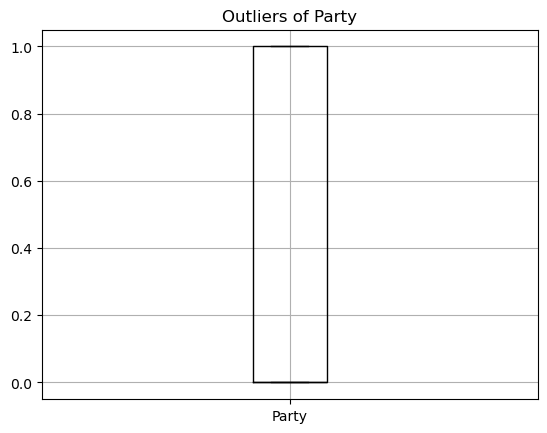

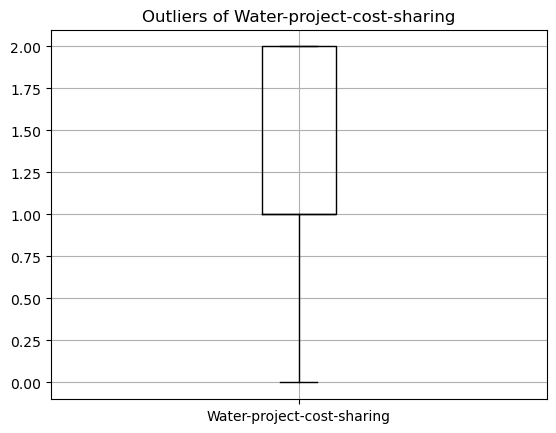

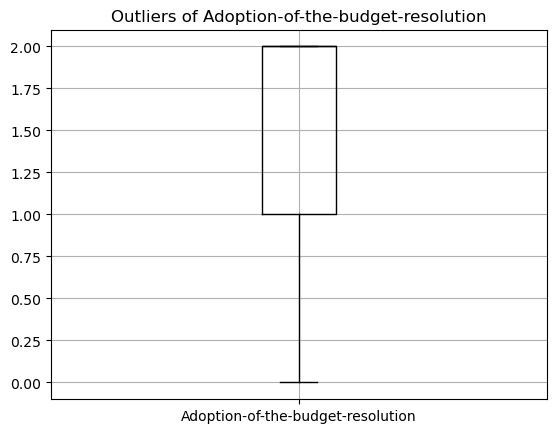

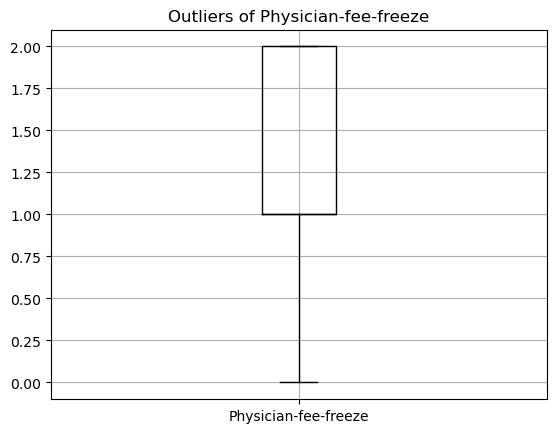

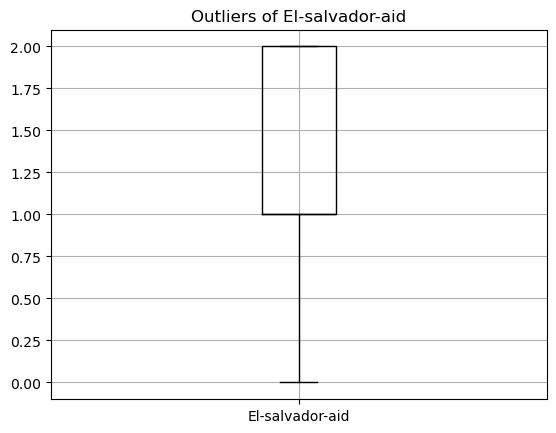

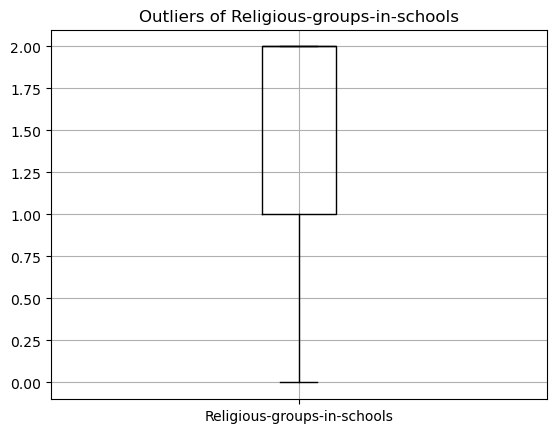

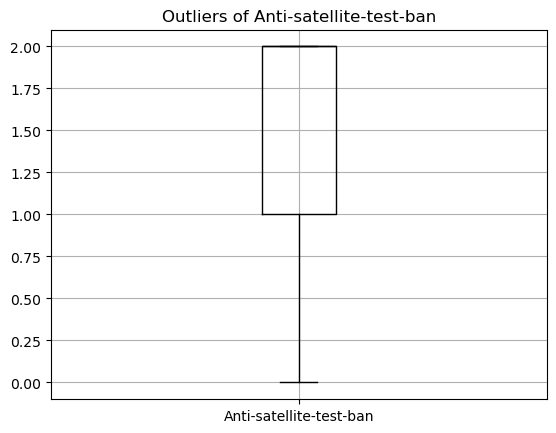

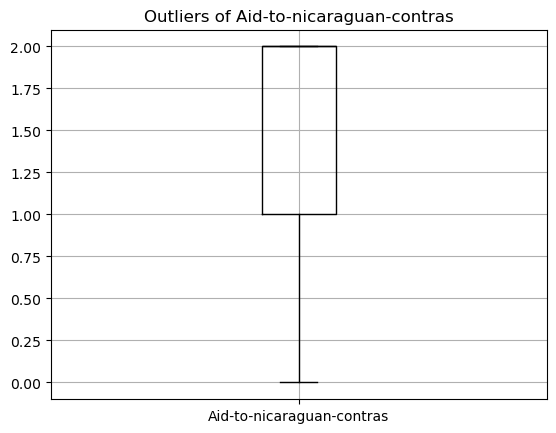

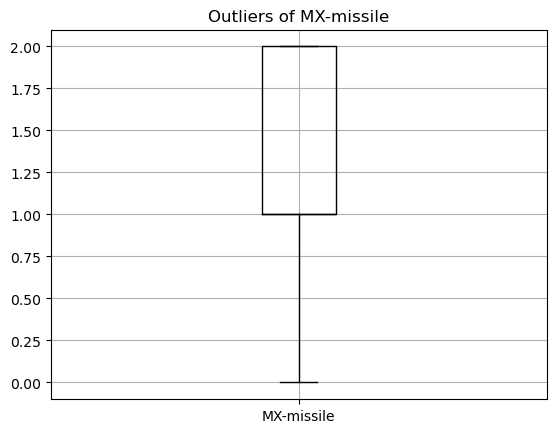

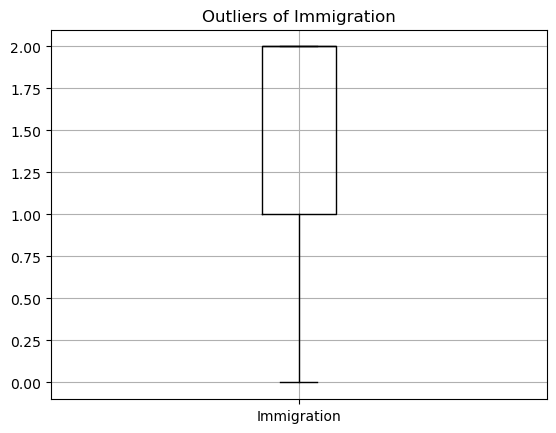

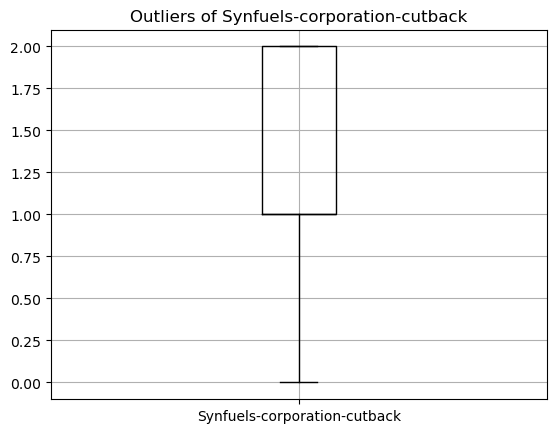

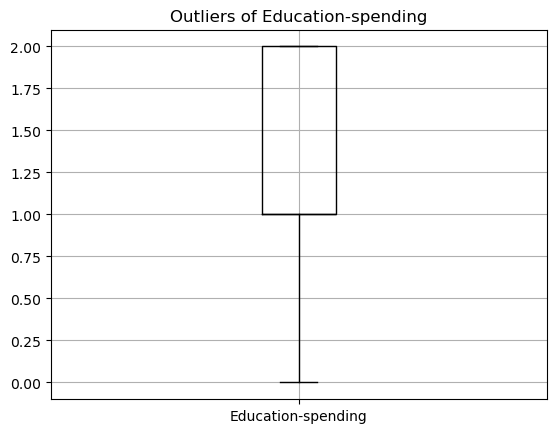

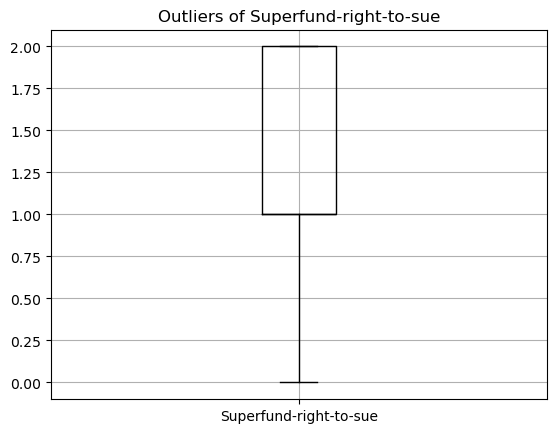

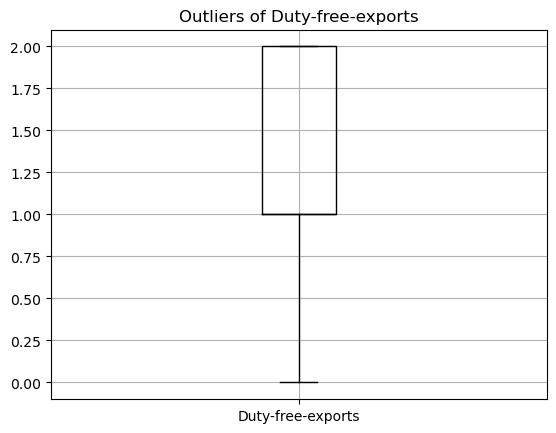

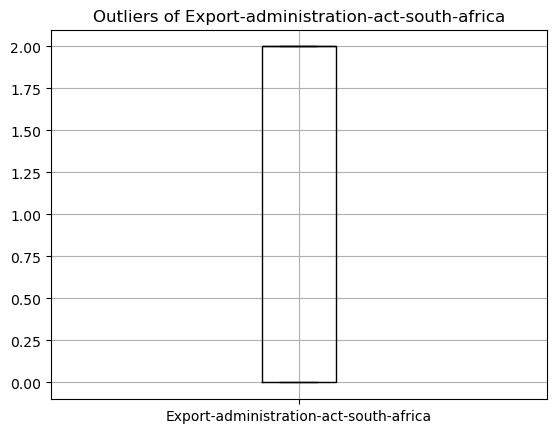

In [405]:
for c in df.columns:
    try:
        df.boxplot(column=[c], color='black')
        plt.title(f"Outliers of {c}")
        plt.show()
    except KeyError:
        print(f"Column '{c}' not found in the DataFrame!")



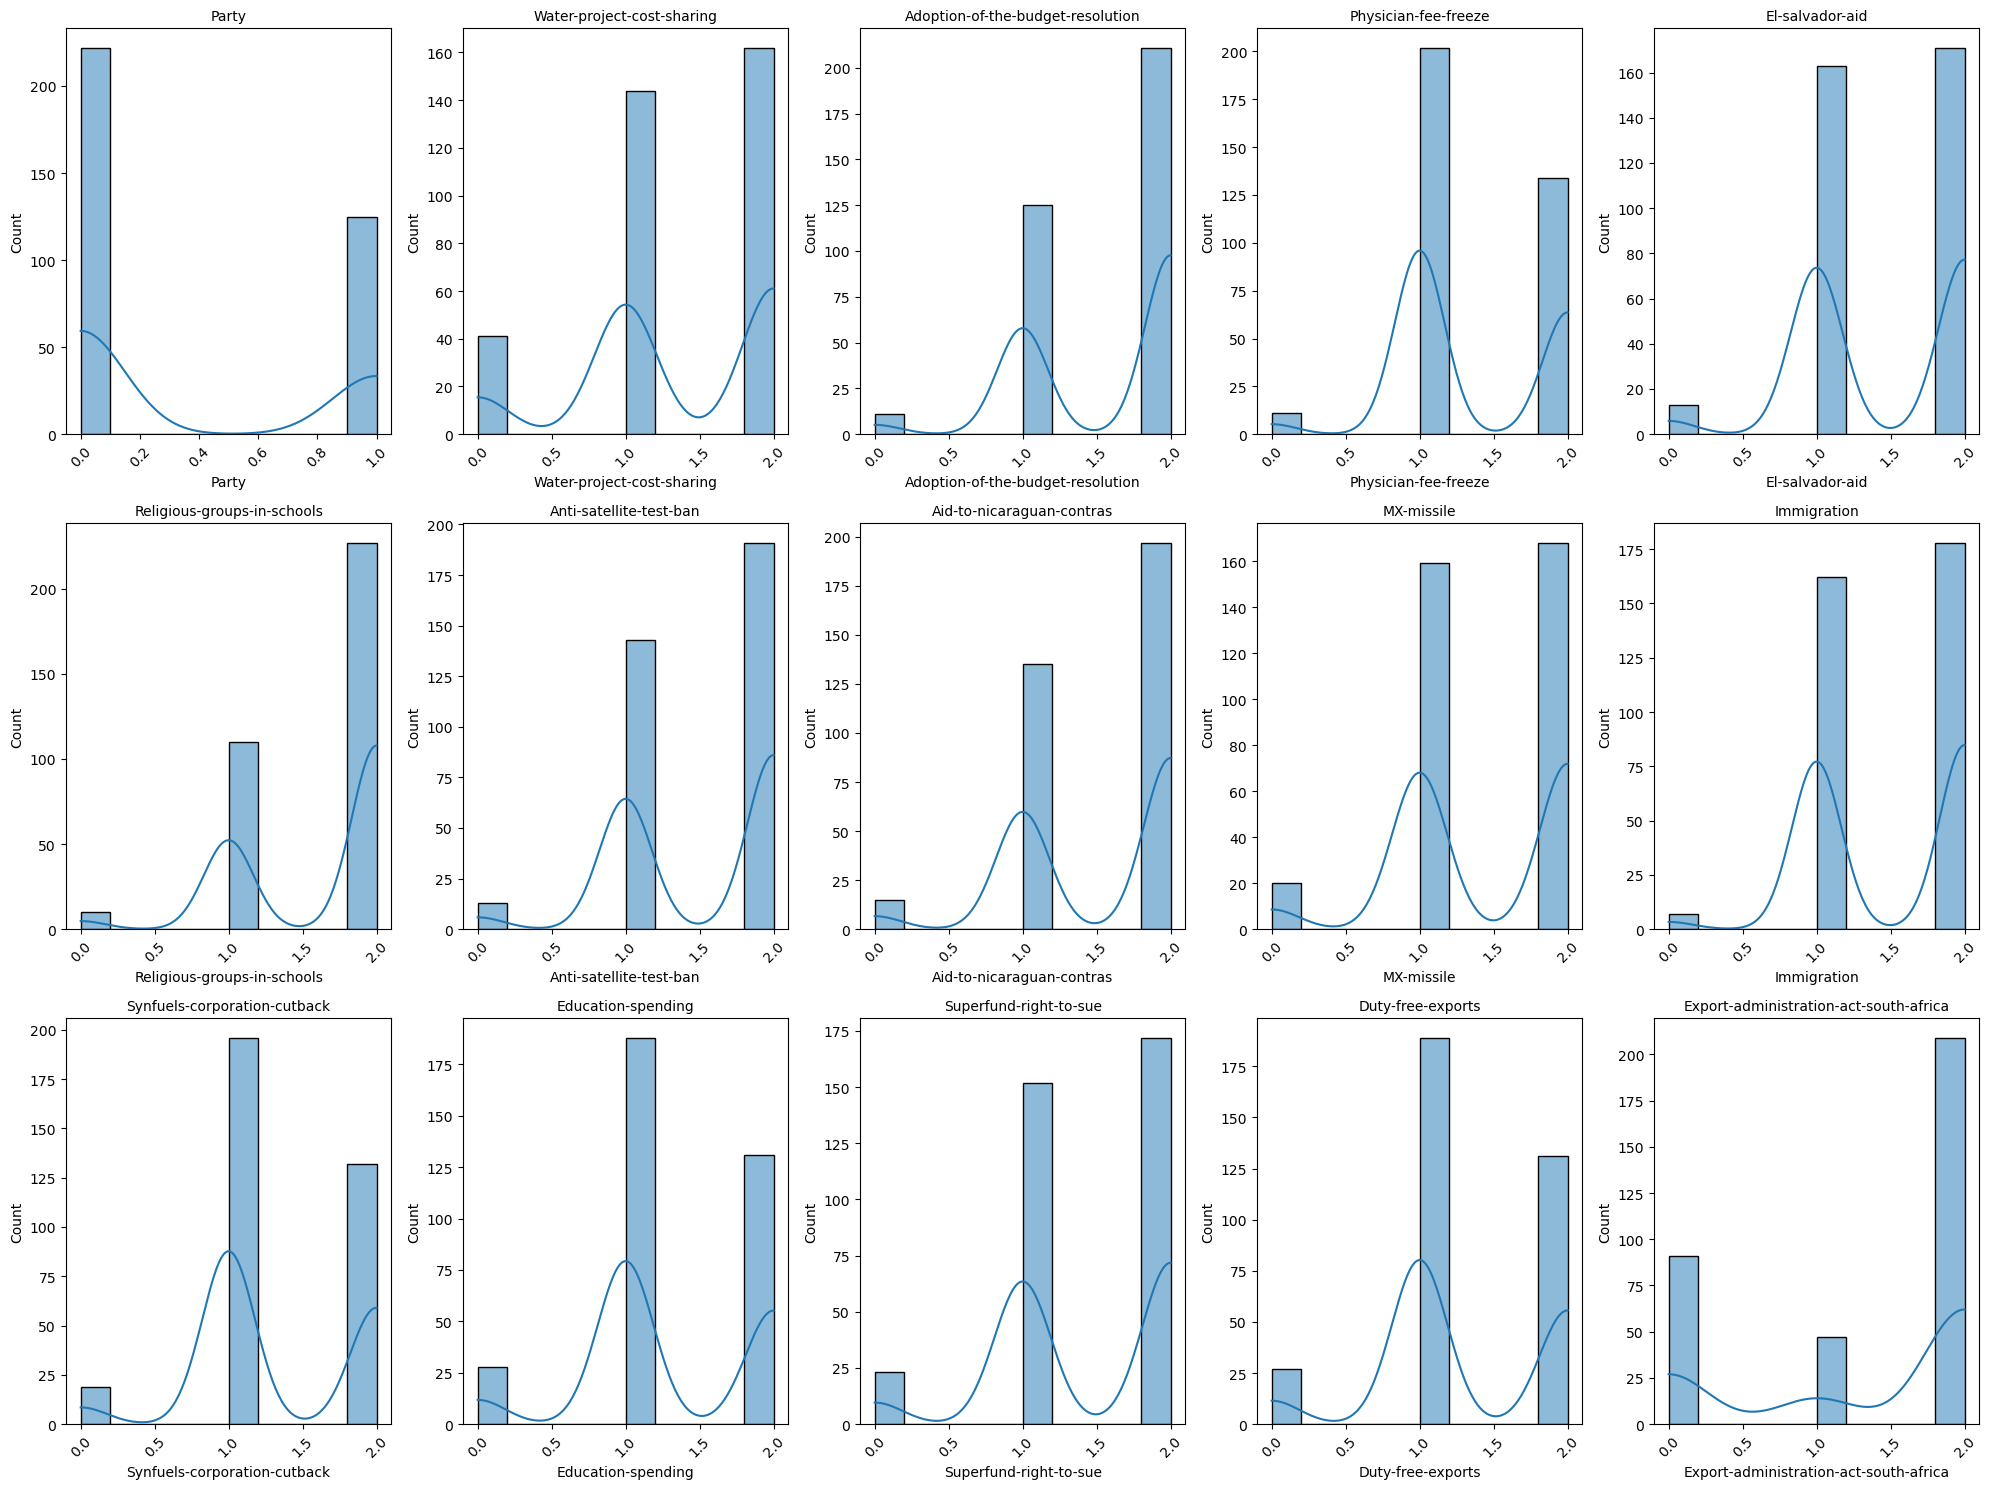

In [406]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)  
    sns.histplot(df[col], kde=True)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

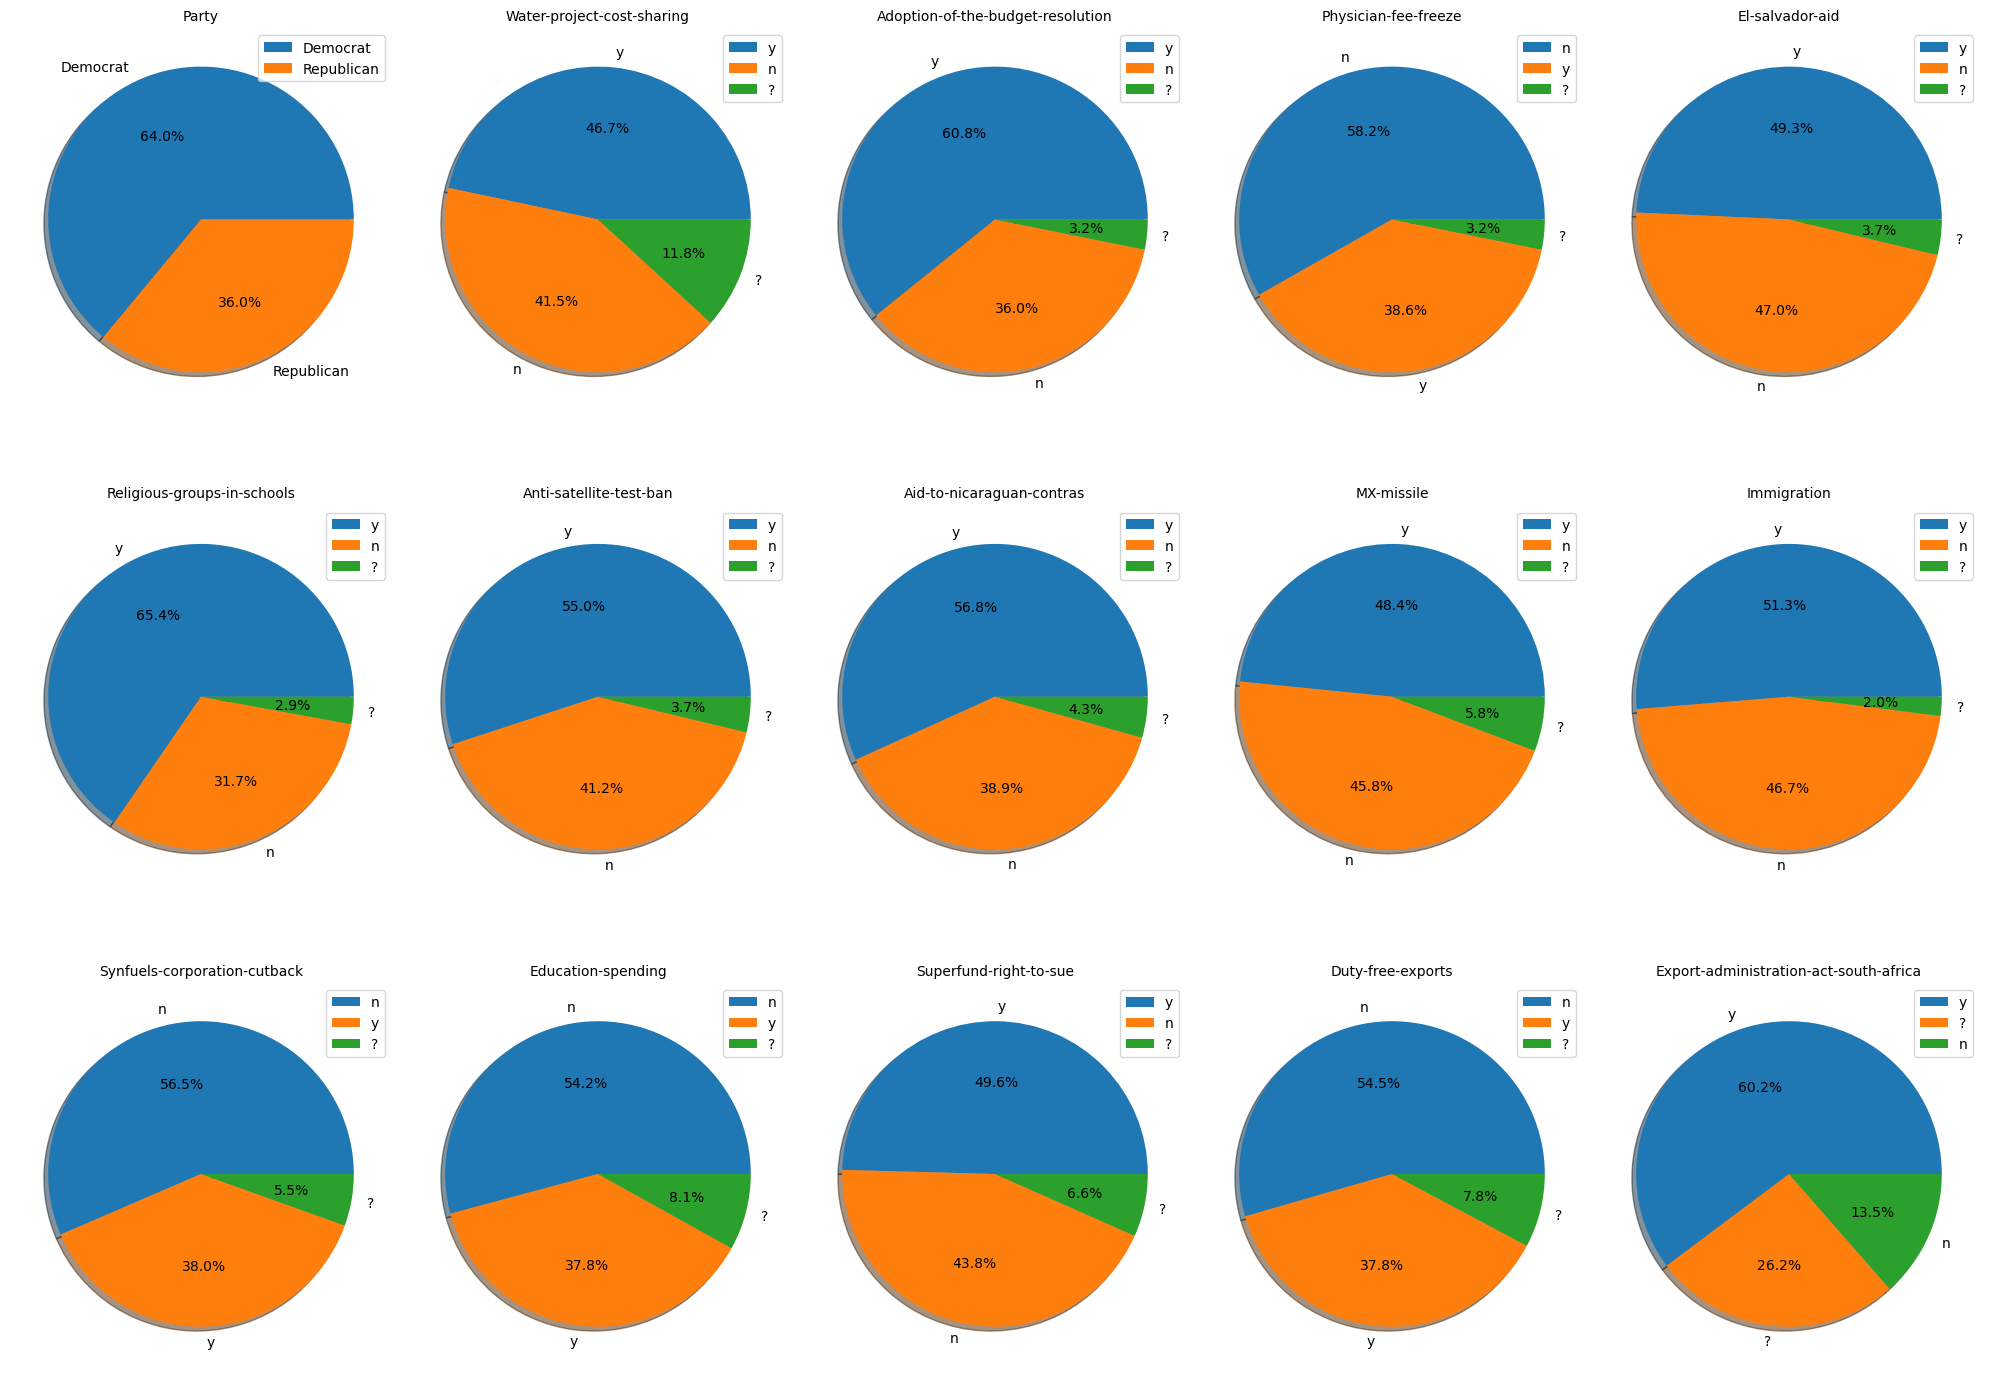

In [407]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(dff.columns):  
    plt.subplot(3, 5, i + 1)  
    plt.pie(dff[col].value_counts(), labels=dff[col].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    plt.title(col, fontsize=10)
    plt.legend()


plt.tight_layout()  
plt.show()

In [450]:
count_tables = {col: pd.crosstab(dff["Party"], dff[col]) for col in x.columns}

In [ ]:
final_table = pd.concat(count_tables, axis=1)
final_table.T

Party                                                              Democrat  Republican
                                       Water-project-cost-sharing                      
Water-project-cost-sharing             ?                                 21          20
                                       n                                 88          56
                                       y                                113          49
Adoption-of-the-budget-resolution      ?                                  6           5
                                       n                                 27          98
                                       y                                189          22
Physician-fee-freeze                   ?                                  7           4
                                       n                                200           2
                                       y                                 15         119
El-salvador-aid                        ?                                 10           3
                                       n                                154           9
                                       y                                 58         113
Religious-groups-in-schools            ?                                  8           2
                                       n                                 94          16
                                       y                                120         107
Anti-satellite-test-ban                ?                                  7           6
                                       n                                 60          83
                                       y                                155          36
Aid-to-nicaraguan-contras              ?                                  4          11
                                       n                                 44          91
                                       y                                174          23
MX-missile                             ?                                 17           3
                                       n                                 57         102
                                       y                                148          20
Immigration                            ?                                  4           3
                                       n                                109          53
                                       y                                109          69
Synfuels-corporation-cutback           ?                                 11           8
                                       n                                 96         100
                                       y                                115          17
Education-spending                     ?                                 16          12
                                       n                                170          18
                                       y                                 36          95
Superfund-right-to-sue                 ?                                 13          10
                                       n                                134          18
                                       y                                 75          97
Duty-free-exports                      ?                                 16          11
                                       n                                 88         101
                                       y                                118          13
Export-administration-act-south-africa ?                                 68          23
                                       n                                 13          34
                                       y                                141          68

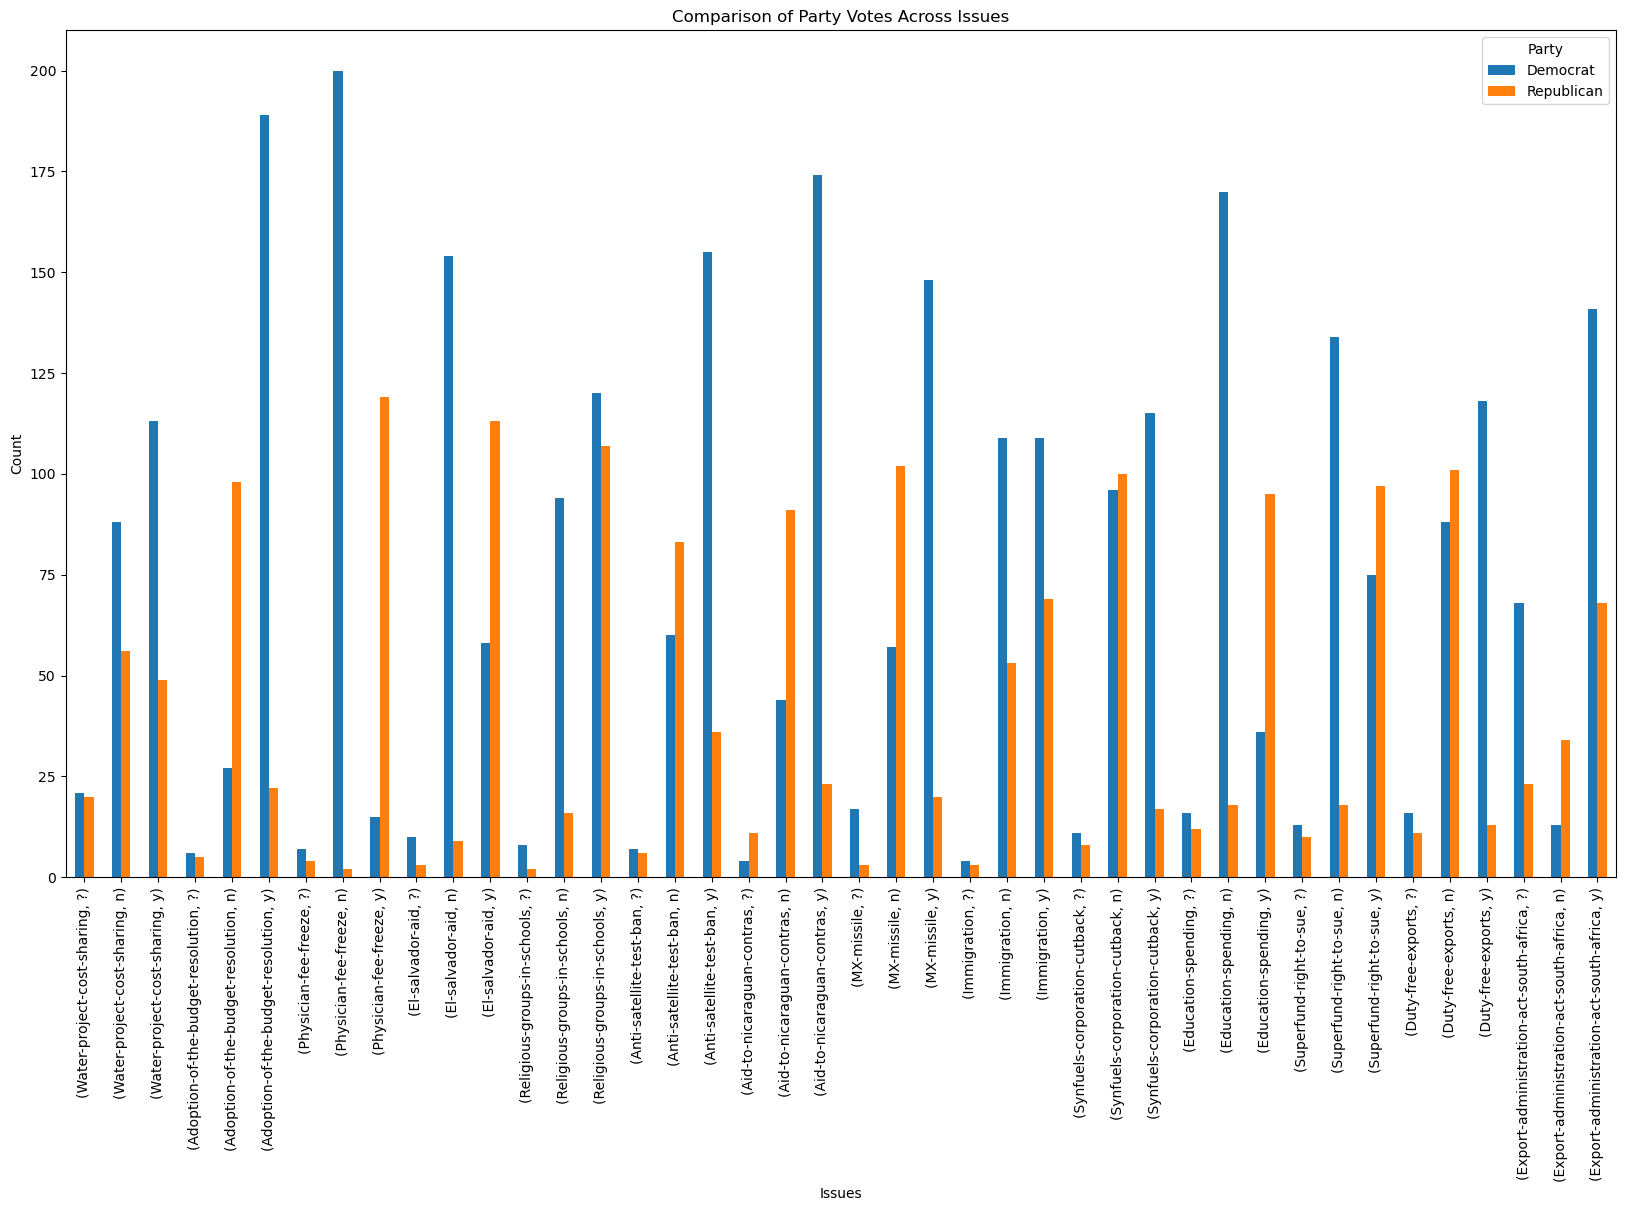

In [489]:
final_table.T.plot(kind='bar', figsize=(20, 11))
plt.title("Comparison of Party Votes Across Issues")
plt.xlabel("Issues")
plt.ylabel("Count")
plt.xticks(rotation=90)  
plt.legend(title="Party")
plt.show()


## **Split Data into Training & Testing Sets**

In [511]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## **Check Class Balance**

In [512]:
y_train.value_counts(normalize=True)

Party
0    0.638989
1    0.361011
Name: proportion, dtype: float64

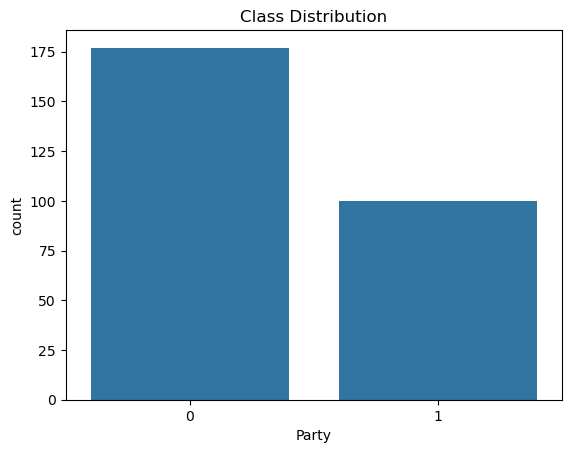

In [513]:
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

## **Handle Imbalanced Data** 

In [514]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


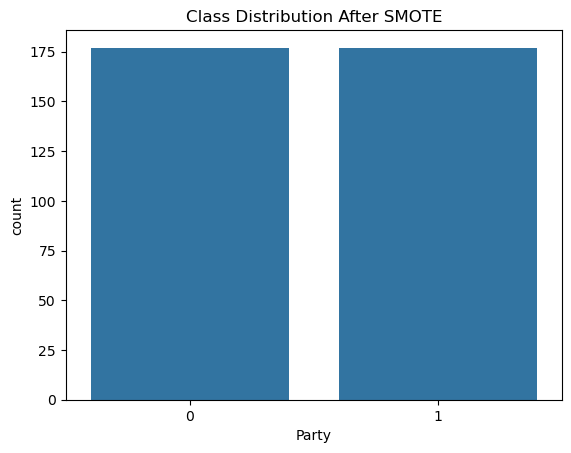

In [515]:
sns.countplot(x=y_train)
plt.title("Class Distribution After SMOTE")
plt.show()

## **Feature scaling**

In [516]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Machine Learning Model**

**1-Logistic Regression**

In [ ]:
lr=LogisticRegression()

In [518]:
lr.fit(x_train, y_train)

LogisticRegression()

In [519]:
y_pred = lr.predict(x_test)

In [520]:
print(lr.score(x_train,y_train))

0.940677966101695


In [521]:
print(lr.score(x_test,y_test))

0.9


In [557]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.80      0.96      0.87        25

    accuracy                           0.90        70
   macro avg       0.89      0.91      0.90        70
weighted avg       0.91      0.90      0.90        70



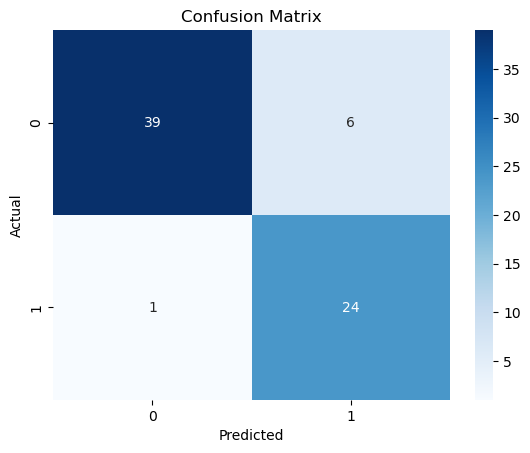

In [523]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [586]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter':[100,200,300]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [587]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [593]:
print("Best Score:", grid.best_score_)

Best Score: 0.9491750503018108


In [589]:
best_lr=grid.best_estimator_

In [590]:
best_pred=best_lr.predict(x_test)

In [592]:
print("Accuracy:", accuracy_score(y_test, best_pred))
print("\n Classification Report:\n", classification_report(y_test, best_pred))

Accuracy: 0.9

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.82      0.92      0.87        25

    accuracy                           0.90        70
   macro avg       0.89      0.90      0.89        70
weighted avg       0.91      0.90      0.90        70



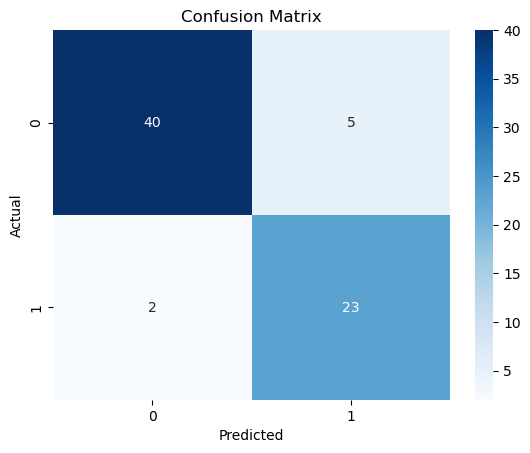

In [594]:
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**2-Random Forest**

In [560]:
rf=RandomForestClassifier()

In [561]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [567]:
y_pred2 = rf.predict(x_test)

In [565]:
print(rf.score(x_train,y_train))

1.0


In [566]:
print(rf.score(x_test,y_test))

0.9285714285714286


In [568]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\n Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9285714285714286

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.88      0.92      0.90        25

    accuracy                           0.93        70
   macro avg       0.92      0.93      0.92        70
weighted avg       0.93      0.93      0.93        70



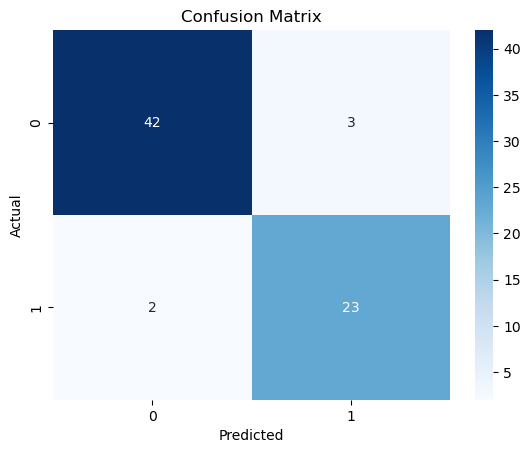

In [569]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [573]:
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid2 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [574]:
print("Best Parameters:", grid2.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [575]:
print("Best Score:", grid2.best_score_)

Best Score: 0.9746478873239436


In [576]:
best_rf=grid2.best_estimator_

In [577]:
best_pred2=best_rf.predict(x_test)

In [578]:
print("Accuracy:", accuracy_score(y_test, best_pred2))
print("\n Classification Report:\n", classification_report(y_test, best_pred2))

Accuracy: 0.9571428571428572

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.89      1.00      0.94        25

    accuracy                           0.96        70
   macro avg       0.95      0.97      0.95        70
weighted avg       0.96      0.96      0.96        70



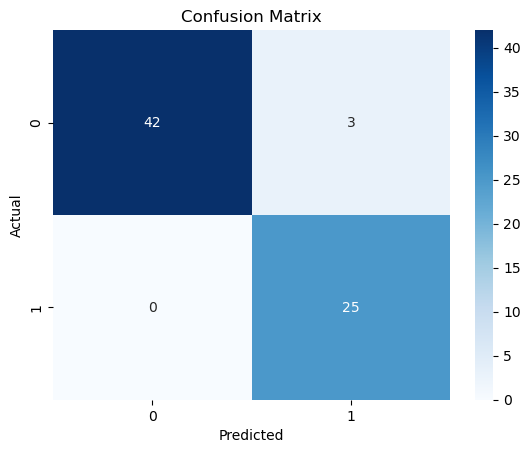

In [579]:
cm = confusion_matrix(y_test, best_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**3-SVM**

In [580]:
svm=SVC()

In [581]:
svm.fit(x_train,y_train)

SVC()

In [582]:
y_pred3=svm.predict(x_test)

In [583]:
print(svm.score(x_train,y_train))

0.980225988700565


In [584]:
print(svm.score(x_test,y_test))

0.9428571428571428


In [585]:
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\n Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.9428571428571428

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.89      0.96      0.92        25

    accuracy                           0.94        70
   macro avg       0.93      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70



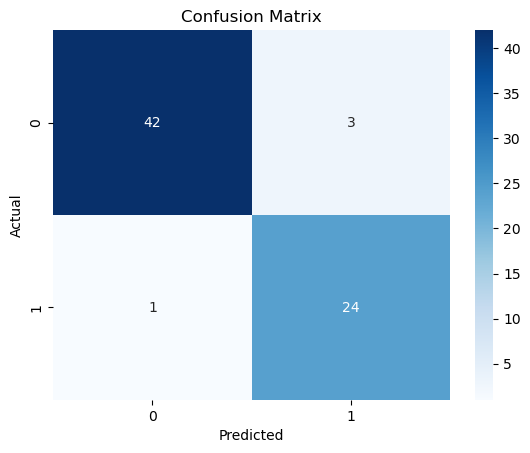

In [595]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [596]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid3 = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [597]:
print("Best Parameters:", grid3.best_params_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [598]:
print("Best Score:", grid3.best_score_)

Best Score: 0.9689738430583501


In [599]:
best_svm=grid3.best_estimator_

In [600]:
best_pred3=best_svm.predict(x_test)

In [601]:
print("Accuracy:", accuracy_score(y_test, best_pred3))
print("\n Classification Report:\n", classification_report(y_test, best_pred3))

Accuracy: 0.9142857142857143

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.88      0.88      0.88        25

    accuracy                           0.91        70
   macro avg       0.91      0.91      0.91        70
weighted avg       0.91      0.91      0.91        70



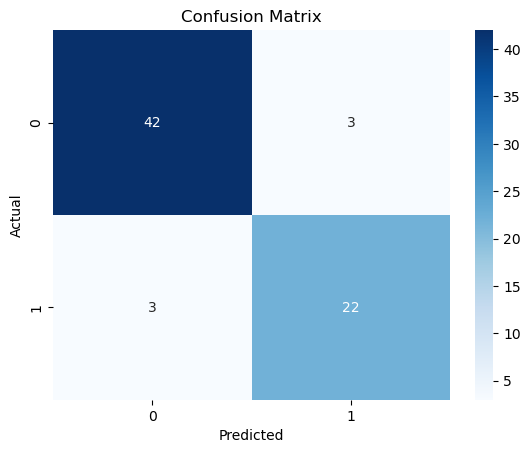

In [602]:
cm = confusion_matrix(y_test, best_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**4-XGBoost**

In [603]:
xg=XGBClassifier()

In [604]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [605]:
y_pred4=xg.predict(x_test)

In [606]:
print(xg.score(x_train,y_train))

0.9971751412429378


In [607]:
print(xg.score(x_test,y_test))

0.9285714285714286


In [608]:
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("\n Classification Report:\n", classification_report(y_test, y_pred4))

Accuracy: 0.9285714285714286

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        45
           1       0.86      0.96      0.91        25

    accuracy                           0.93        70
   macro avg       0.92      0.94      0.92        70
weighted avg       0.93      0.93      0.93        70



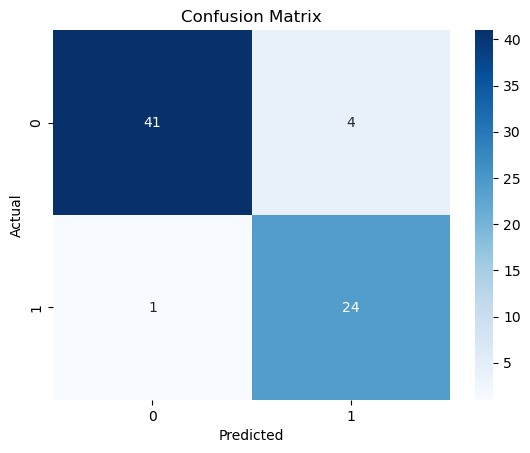

In [609]:
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [616]:
param_grid = {
    'n_estimators': [100, 300, 500,800],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'max_depth': [3, 5, 7,9],
    'min_child_weight': [1, 3, 5,7],
    'subsample': [0.7, 0.8, 1.0,1.5],
    'colsample_bytree': [0.7, 0.8, 1.0,1.5]
}

grid4 = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid4.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
8960 fits failed out of a total of 20480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\farida hassan\AppData\Roaming\Pytho

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0, 1.5],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [100, 300, 500, 800],
                         'subsample': [0.7, 0.8, 1.0, 1.5]},
             scoring='accuracy')

In [617]:
print("Best Parameters:", grid4.best_params_)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 800, 'subsample': 0.8}


In [618]:
print("Best Score:", grid4.best_score_)

Best Score: 0.9689738430583501


In [619]:
best_xg=grid4.best_estimator_

In [620]:
best_pred4=best_xg.predict(x_test)

In [621]:
print("Accuracy:", accuracy_score(y_test, best_pred4))
print("\n Classification Report:\n", classification_report(y_test, best_pred4))

Accuracy: 0.9428571428571428

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.89      0.96      0.92        25

    accuracy                           0.94        70
   macro avg       0.93      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70



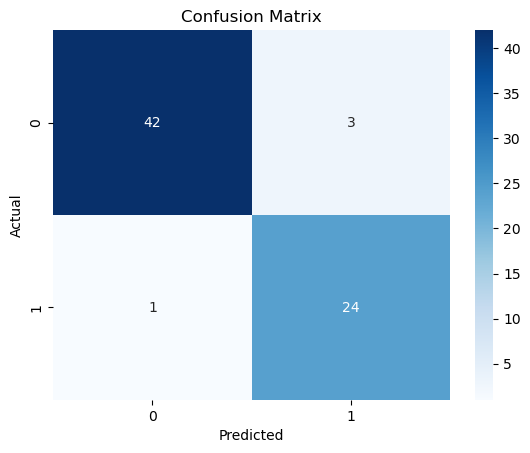

In [622]:
cm = confusion_matrix(y_test, best_pred4)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Best ML models accuracy**
  * **1-Random Forest (after tuning hyperparameters)**
  * **2-SVM (before tuning hyperparameters)**
  * **3-XGBoost (after tuning hyperparameters)**
  * **4-Logistic Regression (after tuning hyperparamaeters)**